# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_csv("tips.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [19]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [28]:
# for cateogrical values
days = df['day'].value_counts()
days

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [29]:
days_normalized = df['day'].value_counts(normalize=True) # percentages
days_normalized

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

<BarContainer object of 4 artists>

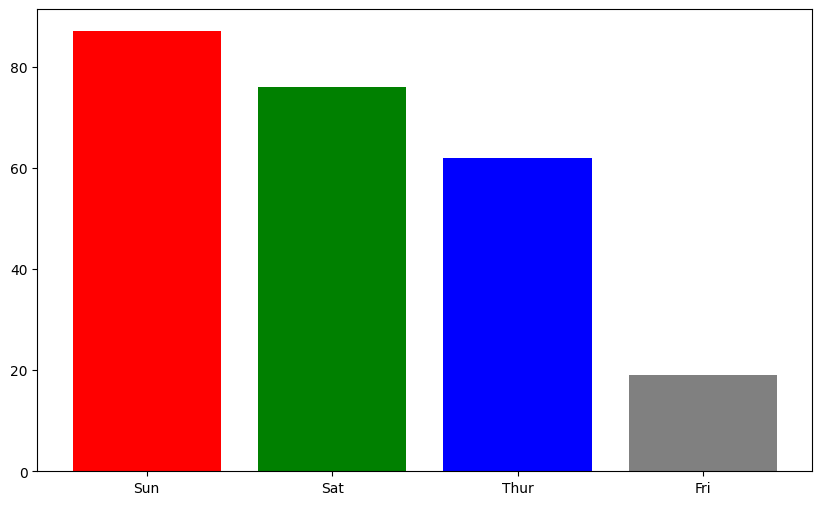

In [27]:
plt.figure(figsize=(10,6))
plt.bar(x=df['day'].unique(), height=df['day'].value_counts(), color=['red', 'green', 'blue', 'gray'])

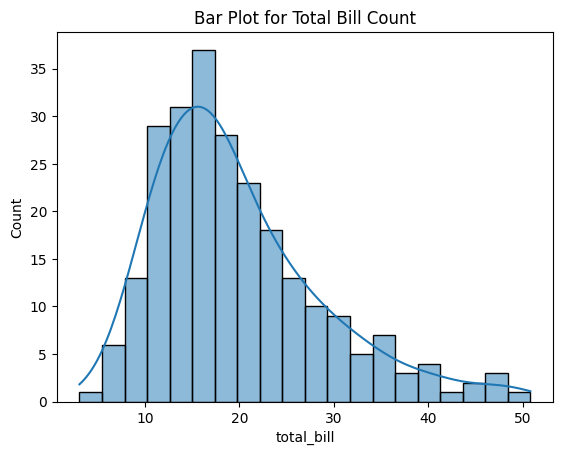

In [37]:
sns.histplot(df['total_bill'], kde=True, bins=20)
plt.title("Bar Plot for Total Bill Count")
plt.show()

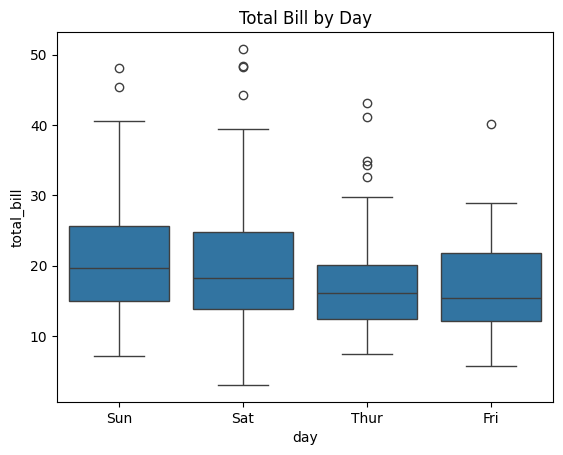

In [32]:
sns.boxplot(x="day", y="total_bill", data=df)
plt.title("Total Bill by Day")
plt.show()

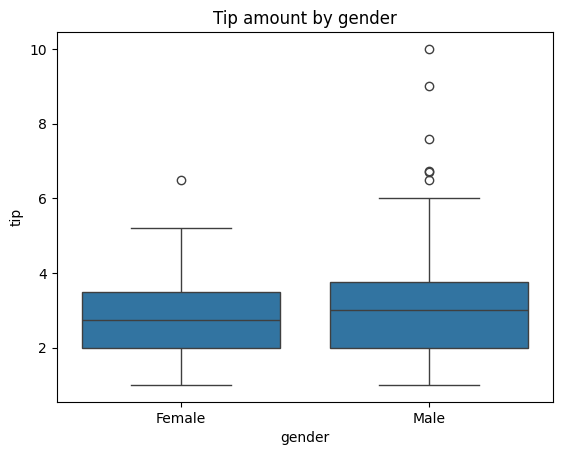

In [34]:
sns.boxplot(x="gender", y="tip", data=df)
plt.title("Tip amount by gender")
plt.show()

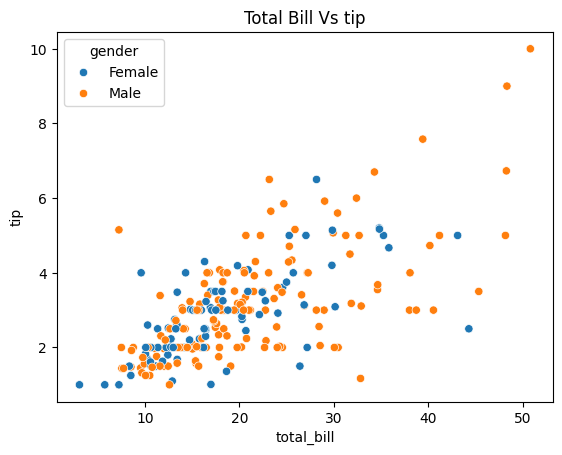

In [35]:
# scatterplot
sns.scatterplot(x="total_bill", y="tip", hue="gender", data=df)
plt.title("Total Bill Vs tip")
plt.show()

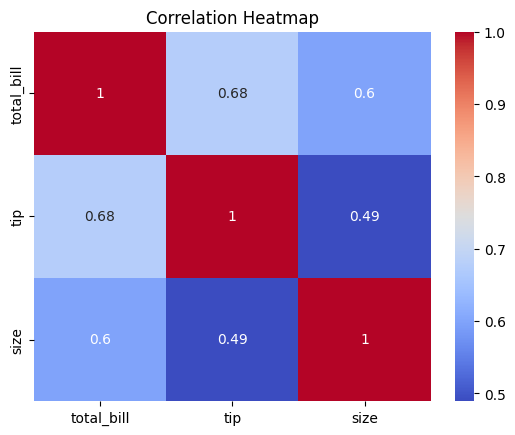

In [38]:
# correlation matrix
corr_mat = df.select_dtypes(include="number").corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Inferential Statistics

In [51]:
# relationship between gender and smoker
from scipy import stats

contingency_table = pd.crosstab(df['gender'], df['smoker'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
print(f"Chi2: {chi2}, P-vaue: {p}")


Chi2: 0.001934818536627623, P-vaue: 0.964915107315732


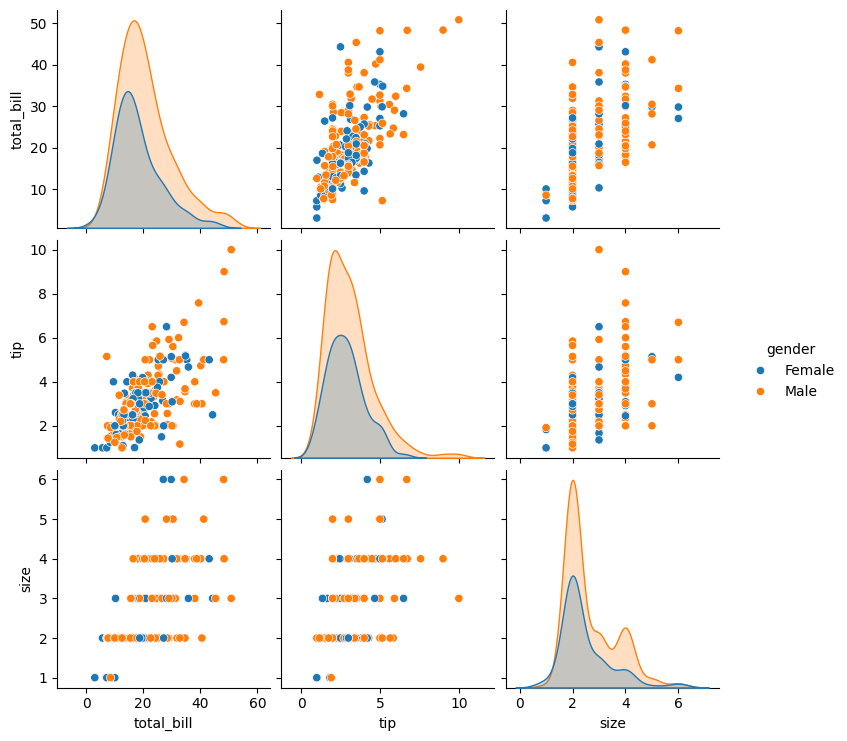

In [52]:
sns.pairplot(df, hue="gender")
plt.show()